In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

In [2]:
# Load Iris dataset (we'll simplify to binary classification: Setosa vs Versicolor)
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# Keep only Setosa and Versicolor classes (labels 0 and 1)
X_binary = X[y != 2]
y_binary = y[y != 2]


In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)


In [5]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [6]:
# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class "1"


In [7]:
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)


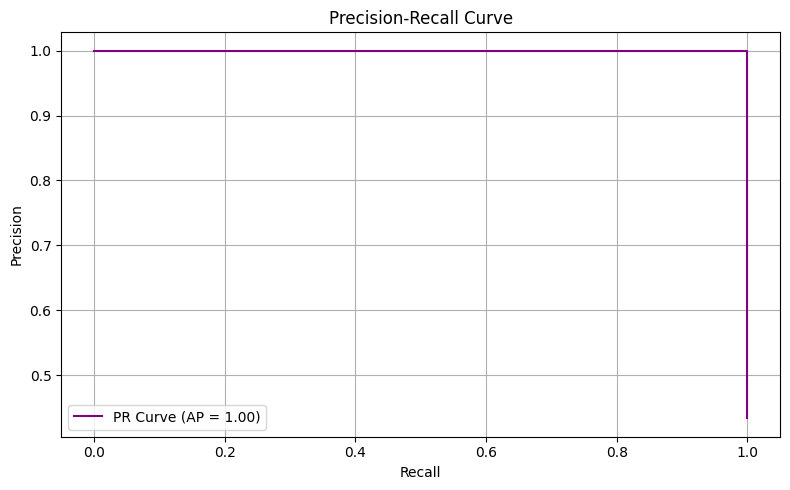

In [8]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 5))
plt.plot(recall, precision, color='purple', label=f'PR Curve (AP = {average_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()